(2,) (2,)
(2,) (2,)
(3,) (4,)
(6,) (8,)
(11,) (16,)
(21,) (31,)


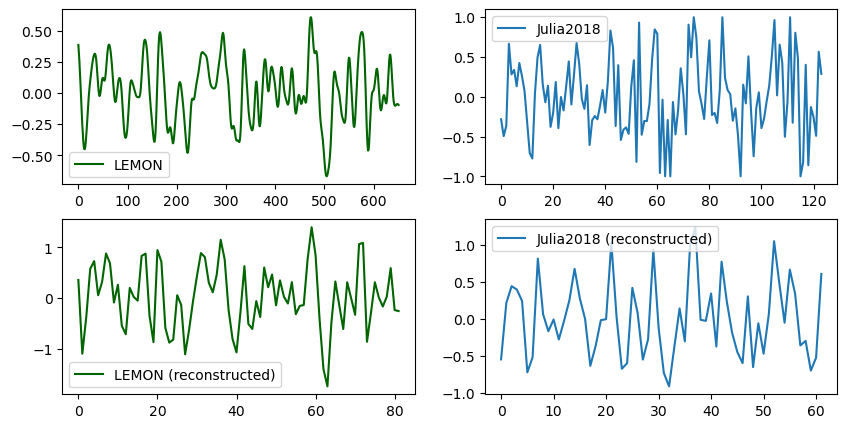

In [138]:
from src.acnets.datasets import LEMONDataModule, Julia2018DataModule

input_type = 'time_regions'


pretrain_datamodule = LEMONDataModule(
    atlas='dosenbach2010', kind='partial correlation',
    aggregation_strategy=input_type, n_subjects=10)
pretrain_datamodule.setup()

finetune_datamodule = Julia2018DataModule(
    atlas='dosenbach2010', kind='partial correlation',
    aggregation_strategy=input_type)

finetune_datamodule.setup()


X1 = pretrain_datamodule.train[0][0][:, 10]
X2 = finetune_datamodule.train[0][0][:, 10]

# original ts
# import matplotlib.pyplot as plt
# import seaborn as sns
# fig, ax = plt.subplots(figsize=(10, 5))
# sns.lineplot(data=X1, ax=ax, label='LEMON', marker='o')
# sns.lineplot(data=X2, ax=ax, label='Julia2018', marker='o')
# plt.suptitle('Original timeseries of a single region')


# wavelet
import pywt
import numpy as np
# ts.transpose('subject', 'region', 'timepoint')

levels_to_keep = 7,6

W1 = pywt.wavedec(X1, wavelet='db1')[:levels_to_keep[0]]
X1_recon = pywt.waverec(W1, wavelet='db1')

# X2_padded = np.pad(X2, (0, X1.shape[0] - X2.shape[0]), mode='constant')
W2 = pywt.wavedec(X2, wavelet='db1')[:levels_to_keep[1]]
X2_recon = pywt.waverec(W2, wavelet='db1')

fig, ax = plt.subplots(2, 2, figsize=(10, 5))

sns.lineplot(data=X1, ax=ax[0][0], label='LEMON', color='darkgreen')
sns.lineplot(data=X2, ax=ax[0][1], label='Julia2018')

sns.lineplot(data=X1_recon, ax=ax[1][0], label='LEMON (reconstructed)', color='darkgreen')
sns.lineplot(data=X2_recon, ax=ax[1][1], label='Julia2018 (reconstructed)')

X1_recon.shape, X2_recon.shape

for w1, w2 in zip(W1, W2):
    print(w1.shape, w2.shape)